In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import sklearn.metrics as skm
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

from PIL import Image, ImageOps

In [ ]:
def AddImage(path):
  test_img = Image.open(path)

  test_img = test_img.resize((5,5))
  test_img = test_img.convert('L')
  '''plt.imshow(test_img, cmap = 'gray')
  plt.show()'''

  test_x = np.array(test_img, np.float32)
  test_x = test_x.reshape(-1,25)
  test_x = test_x / 255
  return test_x[0]

In [ ]:
def AddGludSmiles(x, y,folderPath):
  for filename in os.listdir(folderPath):
    x.append(AddSmile(os.path.join(folderPath, filename)))
    y.append(1)

def AddUglySmiles(x, y,folderPath):
  for filename in os.listdir(folderPath):
    x.append(AddSmile(os.path.join(folderPath, filename)))
    y.append(0)


In [ ]:
def Hebba(weight, x0, y, e):
    #Обучает вес по правилу хебба
    alpha = 0.4
    return weight - alpha * x0 * (y - e)
    
def sigmoid(x):
    return 1 if x > 0 else 0
    

In [ ]:
class Neuron:
    def __init__(self, weights, bias =1, biasWigth = 1):
        self.Weights = weights
        self.DeltaWeights = np.zeros(len(weights))
        self.Bias = bias
        self.Beta = 0
        self.BiasWigth = biasWigth
    
    def feedforward(self, inputs):
        self.LastInput = inputs
        total = np.dot(self.Weights, inputs) + self.Bias * self.BiasWigth
        self.LastRezult = total
        return sigmoid(total)
    
    
    def WeightCorrection(self, function, y, e):
        for i in range(len(self.Weights)):
                self.Weights[i] = function(self.Weights[i], self.LastInput[i], y, e)
                
        self.BiasWigth = function(self.BiasWigth, self.Bias, y, e)
                

    

In [ ]:
class HebbNetwork:
    def __init__(self, neuronsCountArray, eps = 0.1):
        '''
        neuronsCountArray example [25, 14, 7, 3, 1] where each number mean
         a count of neurons in the layer
        ''' 
        self.Eps = eps
        self.T = 0
        self.L = []
        self.Neurons = {}
        for i in range(1, len(neuronsCountArray)):
          self.Neurons[i] = []
          for j in range(neuronsCountArray[i]):
            self.Neurons[i].append(Neuron(np.random.rand(neuronsCountArray[i-1]), 1)) 
    
    def fit(self, X, y):
        t = 1
        self.CalculateLoss(X,y)
        while self.L[len(self.L)-1] > self.Eps and t < 1000:
            for i in range(len(X)):
                e = self.feedforward(X[i])
                if e != y[i]:
                    self.WeightCorrection(e, y[i])
                    self.CalculateLoss(X,y)
                    t+=1
        print("network was learned for",t,"generations")
        self.T = t
    
    def predict(self, data):
        return self.feedforward(data)
        
    def feedforward(self, inputs):
        y = [neuron.feedforward(inputs) for neuron in self.Neurons[1]]
        for i in self.Neurons:
          if i == 1:
            continue
          else:
            y = [neuron.feedforward(y) for neuron in self.Neurons[i]]
        
        return y[0]

    def CalculateLoss(self, x,y):
      loss = 0
      for j in range(len(x)):
        e = self.feedforward(x[j])
        if e != y[j]:
          loss +=1
      self.L.append(loss/len(x))
      return loss/len(x)


    def WeightCorrection(self,y,e):
        function = Hebba
        for i in self.Neurons:
          [neuron.WeightCorrection(function,y,e) for neuron in self.Neurons[i]]

In [ ]:
x = []
y = []
AddUglySmiles(x,y,'/content/drive/My Drive/Neurons/UglySmiles')
AddGludSmiles(x,y,'/content/drive/My Drive/Neurons/GludSmiles')
x = np.array(x)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Trains


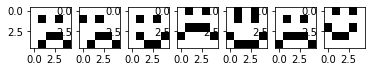

Tests


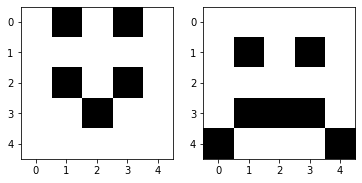

In [ ]:
print("Trains")
for i in range(7):
  plt.subplot(1,7, i+1)
  plt.imshow(X_train[i].reshape(5,5), cmap = "gray")
plt.show()
print("Tests")
for i in range(2):
  plt.subplot(1,2, i+1)
  plt.imshow(X_test[i].reshape(5,5), cmap = "gray")

network was learned for 9 generations
testLoss:  0.25


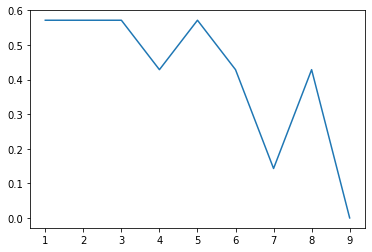

In [ ]:
perceptron = HebbNetwork([25, 12, 3, 1], 0.1)
perceptron.fit(X_train,y_train)
print("testLoss: ",perceptron.CalculateLoss(X_test, y_test))
plt.plot(range(1,perceptron.T+1), perceptron.L[:perceptron.T])

In [ ]:
print(y)
print("train")
for i in range(len(X_train)):
  print(y_train[i],":",perceptron.feedforward(X_train[i]))
print("test")
for i in range(len(X_test)):
  print(y_test[i],":",perceptron.feedforward(X_test[i]))

[0 0 0 0 0 1 1 1 1 1 1]
train
0 : 0
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
test
1 : 0
0 : 0
1 : 1
1 : 1


In [ ]:
def sigmoid(x):
    #Сигмоидная функция активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))
    #return 1 if x > 0 else 0

def dersigmoid(s):
  return sigmoid(s) * (1 - sigmoid(s))

class HebbNetworkGradient:
    def __init__(self, neuronsCountArray, eps = 0.1):
        '''
        neuronsCountArray example [25, 14, 7, 3, 1] where each number mean
         a count of neurons in the layer
        ''' 
        self.Eps = eps
        self.T = 0
        self.L = []
        self.Neurons = {}
        for i in range(1, len(neuronsCountArray)):
          self.Neurons[i] = []
          for j in range(neuronsCountArray[i]):
            self.Neurons[i].append(Neuron(np.random.randint(-5,5,neuronsCountArray[i-1]), 1)) 
    
    def fit(self, X, y):
        self.T = 1
        self.CalculateLoss(X,y)
        while self.L[len(self.L)-1] > self.Eps and self.T < 25000:
          n_rule = np.random.randint(0, len(X))
          e = self.feedforward(X[n_rule])
          if any(np.abs(self.lossFunction(y[n_rule],e)) > self.Eps):
              self.WeightCorrection(y[n_rule])
              self.CalculateLoss(X,y)
              self.T+=1
        print("network was learned for",self.T,"generations")
    
    def predict(self, data):
        return self.feedforward(data)
        
    def feedforward(self, inputs):
        y = [neuron.feedforward(inputs) for neuron in self.Neurons[1]]
        for i in self.Neurons:
          if i == 1:
            continue
          else:
            y = [neuron.feedforward(y) for neuron in self.Neurons[i]]
        
        return y

    def lossFunction(self, e, y):
      return np.square(e - y)

    def CalculateLoss(self, x,y):
      loss = 0
      for j in range(len(x)):
        e = self.feedforward(x[j])
        loss += self.lossFunction(e, y[j])
      
      self.L.append(sum(loss)/len(x))
      if self.T %1000 == 0:
          print("T",self.T,"Loss",self.L[len(self.L)-1])
      return sum(loss)/len(x)

    def CalculateAcc(self, x,y):
      loss = 0
      for j in range(len(x)):
        e = self.feedforward(x[j])
        loss += 1 if np.abs(e - y[j]) < 0.3 else 0
      
      self.Acc.append(loss/len(x))

    def WeightCorrection(self,e):#(e-y)*e*(2-e)
      lam = 0.1
      for neurone in self.Neurons[len(self.Neurons)]:
        y = sigmoid(neurone.LastRezult)
        beta = (y - e) * dersigmoid(neurone.LastRezult)
        neurone.Weights = neurone.Weights - np.dot(lam * beta,neurone.LastInput)
        beta1 = beta * neurone.Weights *  dersigmoid(neurone.LastRezult)
        self.AddBetaInPreviousLayer( beta1, len(self.Neurons)-1)


      self.BackLayerPropagation(len(self.Neurons)-1)
    
    def BackLayerPropagation(self, layerIndex):
      lam = 0.1
      if layerIndex == 0:
        return
      #Для всех слоёв не считая начального
      for neurone in self.Neurons[layerIndex]:
        neurone.Weights = neurone.Weights - np.dot(lam * neurone.Beta, neurone.LastInput)
        beta1 = neurone.Beta * neurone.Weights *  dersigmoid(neurone.LastRezult)
        self.AddBetaInPreviousLayer( beta1, len(self.Neurons)-1)
        
      
      self.BackLayerPropagation(layerIndex-1) 
      for neurone in self.Neurons[layerIndex]:     
        neurone.Beta = 0


    def AddBetaInPreviousLayer(self, beta, layerIndex):
      if layerIndex == 0:
        return
      for i in range(len(self.Neurons[layerIndex])):
        self.Neurons[layerIndex][i].Beta += beta[i]
    

T 1000 Loss 0.19767062100181182
T 2000 Loss 0.1858919901175518
T 3000 Loss 0.1686531964772263
T 4000 Loss 0.15241400642023498
T 5000 Loss 0.15051248256999258
T 6000 Loss 0.15832900730609725
T 7000 Loss 0.15048711241222174
T 8000 Loss 0.12716133345418038
T 9000 Loss 0.12750095573163955
T 10000 Loss 0.12289974780567632
T 11000 Loss 0.12859114562700583
T 12000 Loss 0.12227432122322537
T 13000 Loss 0.1177512839571615
T 14000 Loss 0.11997689201545343
T 15000 Loss 0.11767579387851569
T 16000 Loss 0.11735835242162174
T 17000 Loss 0.11658585858960065
T 18000 Loss 0.11307578883851972
T 19000 Loss 0.11853539500592732
T 20000 Loss 0.11203294740138395
T 21000 Loss 0.1106115679256732
T 22000 Loss 0.11373073521904088
T 23000 Loss 0.10770014422560838
T 24000 Loss 0.11189315485258719
network was learned for 25000 generations
T 25000 Loss 0.11652783006859459
testLoss:  0.11652783006859459


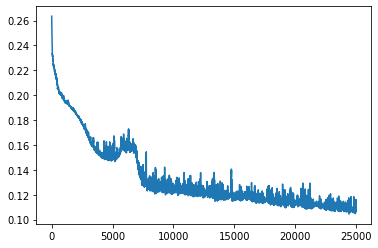

In [ ]:
perceptron = HebbNetworkGradient([25, 12,12, 4, 1], 0.1)
perceptron.fit(X_train,y_train)
print("testLoss: ",perceptron.CalculateLoss(X_test, y_test))
plt.plot(range(1,perceptron.T+1), perceptron.L[:perceptron.T])
plt.show()

In [ ]:
print(y)
print("train")
for i in range(len(X_train)):
  print(y_train[i],":",perceptron.feedforward(X_train[i]))
print("test")
for i in range(len(X_test)):
  print(y_test[i],":",perceptron.feedforward(X_test[i]))

[0 0 0 0 0 1 1 1 1 1 1]
train
0 : [0.31340037034453605]
0 : [0.11219509539433019]
1 : [0.6832989817902185]
0 : [0.5676569428854745]
1 : [0.9917928347129581]
0 : [0.1602014947589783]
1 : [0.5571997452463088]
test
1 : [0.5660231097191886]
0 : [0.1602014947589783]
1 : [0.5652899935150538]
1 : [0.7487270999183915]
